<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [4]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [5]:
# Answer:
movies.shape
# The movies dataframe contains 979 rows and 6 columns.

(979, 6)

#### Check the data type of each column.

In [6]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [7]:
# Answer:
movies.duration.mean()
# The average movie duration is just over two hours.

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [13]:
# Answer:
movies[['title', 'duration']].sort_values('duration',ascending=True)

,title,duration
389,Freaks,64
338,Battleship Potemkin,66
258,The Cabinet of Dr. Caligari,67
293,Duck Soup,68
88,The Kid,68
742,Following,69
351,Frankenstein,70
938,Alice in Wonderland,75
405,The Bride of Frankenstein,75
303,The Nightmare Before Christmas,76


#### Create a histogram of duration, choosing an "appropriate" number of bins.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000202A49E49B0>]],
      dtype=object)

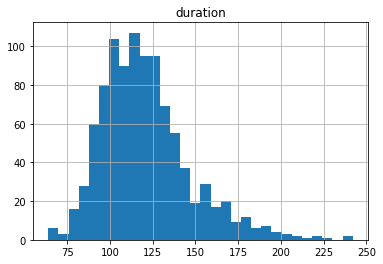

In [24]:
# Answer:
movies.hist(column='duration', bins=30)

#### Use a box plot to display that same data.

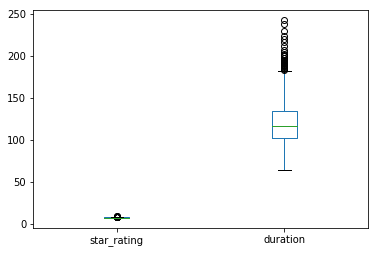

In [25]:
# Answer:
movies.plot.box(by='duration')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [51]:
# Answer:
movies.content_rating.value_counts()   
# this also works: movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5, 1.0, 'Movies by Rating')

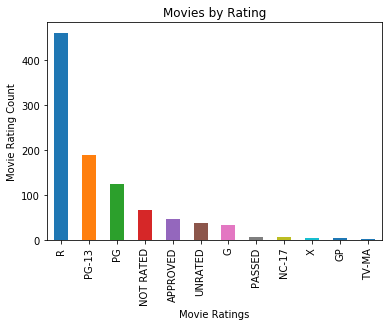

In [60]:
# Answer:
movies.content_rating.value_counts().plot(kind='bar')
plt.ylabel('Movie Rating Count')
plt.xlabel('Movie Ratings')
plt.title('Movies by Rating')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [66]:
# Answer:
movies.content_rating.replace('NOT RATED', 'UNRATED', inplace=True)
movies.content_rating.replace('APPROVED', 'UNRATED', inplace=True)
movies.content_rating.replace('PASSED', 'UNRATED', inplace=True)
movies.content_rating.replace('GP', 'UNRATED', inplace=True)
movies.content_rating.value_counts() 

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [72]:
# Answer:
movies.content_rating.replace('X', 'NC-17', inplace=True)
movies.content_rating.replace('TV-MA', 'NC-17', inplace=True)
movies.content_rating.value_counts() 

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [73]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [74]:
# Answer:
#I used the bellow code to see which movies had NaN ratings.
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [77]:
# Answer- replacement ratings:
movies.fillna(value='PG', inplace=True)
#check that NaN values have been replaced.
movies[movies.content_rating.isnull()]
#I was able to look up the three movies with NaN values quickly, but for a very large dataset with
#many NaN values, this would probably not be feasible.

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [84]:
# Answer:
movies[movies.duration>120].mean()


star_rating      7.953670
duration       143.385321
dtype: float64

In [85]:
# Answer:
#The average star rating is slightly higher for movies greater than 2 hours in duration.
movies[movies.duration<120].mean()

star_rating      7.838667
duration       102.405714
dtype: float64

#### Use a visualization to detect whether there is a relationship between duration and star rating.

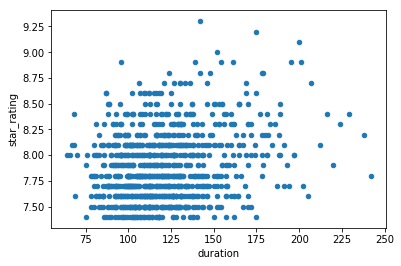

In [89]:
# Answer:
movies.plot(kind='scatter', x='duration', y='star_rating');
#I would use a scatter plot to explore relationships between
#duration and star rating.

#### Calculate the average duration for each genre.

In [88]:
# Answer:
movies.groupby('genre').[movies.duration<120].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

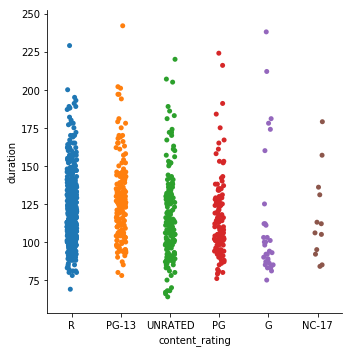

In [110]:
# Answer:
sns.catplot(x='content_rating', y='duration', data=movies);

#### Determine the top rated movie (by star rating) for each genre.

In [119]:
#Checking genre types:
movies.genre.value_counts()  

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [152]:
# Answer:
movies.groupby('genre')[['title', 'star_rating']].agg(['max'])

,title,star_rating
,max,max
genre,,
Action,Yojimbo,9.0
Adventure,True Grit,8.9
Animation,Wreck-It Ralph,8.6
Biography,Walk the Line,8.9
Comedy,Zombieland,8.6
Crime,Zodiac,9.3
Drama,Zulu,8.9
Family,Willy Wonka & the Chocolate Factory,7.9


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [155]:
#Answer
#check for duplicates in the title column only
movies.duplicated(['title']).sum()
#this check revealed 4 duplicate titles

4

In [154]:
#checek if 4 duplicates in title column are actual duplicates
movies.duplicated().sum() 
#it does not appear that the 4 title duplicates are actual duplicates

0

In [159]:
#double check for duplicates
movies[movies.duplicated()]
#again, it does not appear that any actual duplicates exist in the movies data set

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [192]:
# Answer:
#Calculate the average star rating for each genre, but only include genres with at least 10 movies
#I came up with the below code as a first attempt, but then I used it to check against the second
#part of the answer (below)
movies.groupby('genre').star_rating.agg(['mean', 'count'])

,mean,count
genre,,
Action,7.884559,136
Adventure,7.933333,75
Animation,7.914516,62
Biography,7.862338,77
Comedy,7.822436,156
Crime,7.916935,124
Drama,7.902518,278
Family,7.850000,2
Fantasy,7.700000,1


In [188]:
# Answer:
#Checked against the code above to ensure that genres with less than 10 movies are not included
genres = movies['genre'].value_counts()[movies['genre'].value_counts() > 10].index
movies[movies['genre'].isin(genres)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [190]:
# Answer:


## Bonus

#### Figure out something "interesting" using the actors data!